In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

adata = sc.read('/dfs/project/perturb-gnn/datasets/trans_norman_adamson/adamson2016.h5ad')

In [2]:
genename2ensembl = dict(zip(adata.var.gene_name.values, adata.var.index.values))
ensembl2genename = dict(zip(adata.var.index.values, adata.var.gene_name.values))

In [3]:
' '.join(adata.var.index.values)

'ENSG00000115977 ENSG00000087884 ENSG00000090861 ENSG00000008311 ENSG00000183044 ENSG00000165029 ENSG00000154265 ENSG00000154262 ENSG00000073734 ENSG00000115657 ENSG00000108846 ENSG00000125257 ENSG00000091262 ENSG00000101986 ENSG00000118777 ENSG00000143994 ENSG00000168792 ENSG00000136379 ENSG00000140526 ENSG00000100439 ENSG00000011198 ENSG00000127220 ENSG00000138443 ENSG00000143322 ENSG00000146386 ENSG00000114626 ENSG00000166016 ENSG00000185065 ENSG00000224505 ENSG00000235560 ENSG00000267439 ENSG00000232759 ENSG00000236453 ENSG00000236754 ENSG00000251259 ENSG00000267666 ENSG00000267778 ENSG00000261204 ENSG00000225792 ENSG00000214870 ENSG00000231704 ENSG00000228434 ENSG00000231255 ENSG00000268030 ENSG00000235852 ENSG00000272070 ENSG00000269019 ENSG00000267549 ENSG00000249502 ENSG00000268621 ENSG00000272473 ENSG00000253392 ENSG00000268292 ENSG00000231294 ENSG00000229127 ENSG00000229970 ENSG00000222030 ENSG00000231312 ENSG00000213981 ENSG00000226756 ENSG00000227946 ENSG00000234350 ENSG000

In [7]:
df_gene2go = pd.read_csv('ensembl_go_norman_adamson.tab', sep = '\t')
df_gene2go['Entry name'] = df_gene2go['Entry name'].apply(lambda x: x.split('_')[0])

In [8]:
len(np.intersect1d(df_gene2go['Entry name'].values, np.unique(adata.var.gene_name.values)))

1790

In [9]:
df_gene2go = df_gene2go[df_gene2go['Gene ontology IDs'].notnull()]
df_gene2go = df_gene2go.rename(columns = {'yourlist:M20211110F248CABF64506F29A91F8037F07B67D12CE7E7H': 'gene_id'})

In [10]:
geneid2go = dict(df_gene2go[['gene_id', 'Gene ontology IDs']].values)

In [11]:
len(np.intersect1d(df_gene2go.gene_id.unique(),adata.var.index.values))

3795

In [12]:
gene2go = {}
for i,j in geneid2go.items():
    j = [k.strip() for k in j.split(';')]
    for k in i.split(','):
        gene2go[ensembl2genename[k]] = j

In [13]:
len(gene2go)

3801

In [14]:
unique_perturbs = []
for i in adata.obs.condition.unique():
    if '+' in i:
        unique_perturbs.append(i.split('+')[0])
        unique_perturbs.append(i.split('+')[1])

In [15]:
unique_perturbs = np.unique(unique_perturbs)

In [16]:
len(unique_perturbs)

85

In [17]:
len(np.intersect1d(list(gene2go.keys()), unique_perturbs))

83

In [18]:
np.setdiff1d(unique_perturbs, list(gene2go.keys()))

array(['TIMM23', 'ctrl'], dtype='<U8')

In [19]:
gene2go

{'AAK1': ['GO:0004674',
  'GO:0005112',
  'GO:0005524',
  'GO:0005737',
  'GO:0005829',
  'GO:0005905',
  'GO:0006468',
  'GO:0006897',
  'GO:0019897',
  'GO:0030136',
  'GO:0031252',
  'GO:0032880',
  'GO:0035612',
  'GO:0043195',
  'GO:0045747',
  'GO:0046777',
  'GO:0050821',
  'GO:0061024',
  'GO:0106310',
  'GO:0106311',
  'GO:2000369'],
 'AAMDC': ['GO:0005737', 'GO:0045600'],
 'AARS': ['GO:0000049',
  'GO:0002161',
  'GO:0002196',
  'GO:0004813',
  'GO:0005524',
  'GO:0005737',
  'GO:0005739',
  'GO:0005829',
  'GO:0006400',
  'GO:0006418',
  'GO:0006419',
  'GO:0008033',
  'GO:0008270',
  'GO:0016020',
  'GO:0016597',
  'GO:0070062'],
 'AASS': ['GO:0000122',
  'GO:0003714',
  'GO:0004753',
  'GO:0004754',
  'GO:0005634',
  'GO:0005737',
  'GO:0005739',
  'GO:0005759',
  'GO:0005829',
  'GO:0006554',
  'GO:0019878',
  'GO:0031061',
  'GO:0033512',
  'GO:0042393',
  'GO:0043231',
  'GO:0047130',
  'GO:0047131'],
 'ABAT': ['GO:0005739',
  'GO:0005759',
  'GO:0009448',
  'GO:0009450

In [20]:
np.setdiff1d(adata.var.gene_name.values, list(gene2go.keys()))[:1000]

array(['AC000068.5', 'AC002117.1', 'AC002310.12', 'AC002398.11',
       'AC002480.3', 'AC003092.1', 'AC004019.13', 'AC004069.2',
       'AC004156.3', 'AC004221.2', 'AC004449.6', 'AC004540.4',
       'AC004540.5', 'AC004895.4', 'AC004951.6', 'AC005009.1',
       'AC005253.2', 'AC005540.3', 'AC005618.6', 'AC005932.1',
       'AC006116.17', 'AC006160.5', 'AC006262.5', 'AC006273.4',
       'AC006277.2', 'AC006547.15', 'AC006994.2', 'AC007038.7',
       'AC007128.1', 'AC007131.1', 'AC007246.3', 'AC007277.3',
       'AC007365.3', 'AC007383.3', 'AC007405.4', 'AC008746.12',
       'AC008781.7', 'AC009410.1', 'AC009501.4', 'AC009506.1',
       'AC010226.4', 'AC010524.4', 'AC010883.5', 'AC010894.3',
       'AC010983.1', 'AC011298.2', 'AC011747.4', 'AC011893.3',
       'AC011997.1', 'AC012442.6', 'AC012531.25', 'AC012594.1',
       'AC016629.3', 'AC016722.4', 'AC016723.4', 'AC016831.7',
       'AC018816.3', 'AC018878.3', 'AC019186.1', 'AC020571.3',
       'AC020594.5', 'AC022007.5', 'AC022182.3',

In [21]:
from tqdm import tqdm
edge_list = []
for g1 in tqdm(gene2go.keys()):
    for g2 in gene2go.keys():
        edge_list.append((g1, g2, len(np.intersect1d(gene2go[g1], gene2go[g2]))/len(np.union1d(gene2go[g1], gene2go[g2]))))

100%|████████████████████████████████████████████████████████████████████████| 3801/3801 [12:16<00:00,  5.16it/s]


In [22]:
edge_list_filter = [i for i in edge_list if i[2] > 0]

In [23]:
len(edge_list_filter)

6574301

<AxesSubplot:ylabel='Density'>

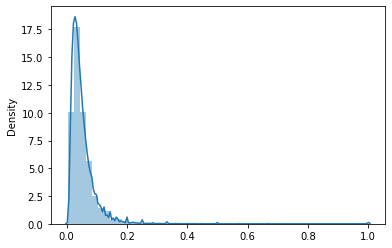

In [24]:
import seaborn as sns
sns.distplot([i[2] for i in edge_list_filter])

In [25]:
len([i for i in edge_list if i[2] > 0.1])

550627

In [26]:
further_filter = [i for i in edge_list if i[2] > 0.1]

<AxesSubplot:ylabel='Density'>

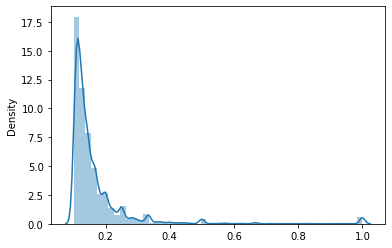

In [27]:
sns.distplot([i[2] for i in further_filter])

In [28]:
df_edge_list = pd.DataFrame(further_filter).rename(columns = {0: 'gene1', 1: 'gene2', 2: 'score'})

In [29]:
dict(df_edge_list.gene1.value_counts())

{'DEF6': 989,
 'MFAP3L': 961,
 'WDR26': 922,
 'MOB1B': 843,
 'NUFIP2': 814,
 'TDRP': 794,
 'ZNF641': 786,
 'ZNF34': 786,
 'ZNF397': 774,
 'EDC4': 742,
 'S100A16': 741,
 'IRF2BP2': 724,
 'HCFC2': 719,
 'DCAF6': 700,
 'KIAA0907': 688,
 'ZNF425': 677,
 'HEXIM2': 670,
 'ARID4B': 667,
 'C9orf135': 667,
 'SPATS2L': 652,
 'GRAP2': 634,
 'FILIP1L': 631,
 'TTC3': 627,
 'RALGAPA2': 617,
 'ARID3A': 616,
 'HARBI1': 609,
 'UBASH3A': 606,
 'UGP2': 603,
 'ADAP1': 600,
 'CITED4': 597,
 'BBX': 591,
 'MYT1': 587,
 'PCBP3': 587,
 'MIDN': 586,
 'KLF6': 584,
 'IRF9': 583,
 'CDCA7': 583,
 'SP110': 582,
 'JAZF1': 580,
 'SH3BGRL': 579,
 'RASSF3': 577,
 'SKAP2': 576,
 'MAP3K7CL': 567,
 'SPATS2': 564,
 'LRRC23': 560,
 'HIVEP3': 559,
 'ZBTB10': 558,
 'ZFAND2A': 557,
 'DMTF1': 556,
 'TSC22D1': 554,
 'CDK15': 553,
 'RNF146': 553,
 'FAM129A': 549,
 'MCC': 548,
 'FAM209A': 546,
 'CCNDBP1': 545,
 'GTF2IRD2B': 545,
 'HERC2': 544,
 'LIMD2': 544,
 'GYPA': 544,
 'ZNF175': 541,
 'ETS2': 540,
 'CC2D1A': 537,
 'YAF2': 537,


In [30]:
#df_edge_list.to_csv('gene_sim_jc_filter_adamson.csv', index = False)

In [31]:
len(df_edge_list.gene1.unique())

3801

In [32]:
df_edge_list_all = pd.DataFrame(edge_list_filter).rename(columns = {0: 'gene1', 1: 'gene2', 2: 'score'})


In [33]:
df_knn = df_edge_list_all.groupby('gene2').apply(lambda x: x.nlargest(11,['score'])).reset_index(drop = True)

<AxesSubplot:ylabel='Density'>

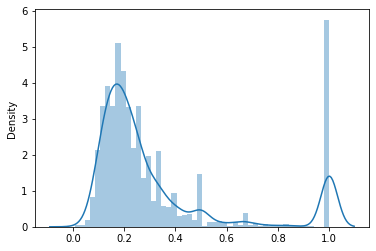

In [34]:
sns.distplot(df_knn.score.values)

In [35]:
df_knn.gene2.value_counts()

AAK1        11
PROS1       11
PRICKLE1    11
PRKAA1      11
PRKAR1A     11
            ..
ANKRD36C     2
NOXRED1      2
C17orf97     1
BCAS4        1
FAM114A2     1
Name: gene2, Length: 3801, dtype: int64

In [36]:
df_knn.to_csv('gene_sim_knn_norman_adamson.csv', index = False)

In [37]:
df_knn

,gene1,gene2,score
0,AAK1,AAK1,1.000000
1,BMP2K,AAK1,0.360000
2,CDK15,AAK1,0.269231
3,CSNK1G1,AAK1,0.269231
4,PIM2,AAK1,0.266667
...,...,...,...
41705,TES,ZYX,0.200000
41706,ADAP1,ZYX,0.185185
41707,CDC42EP3,ZYX,0.185185
41708,GRAP2,ZYX,0.185185
